In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
T = 100
n = 10
alpha = 0.9
beta = 0.2
gamma = 0.1
Lambda = [1,5]
cpd_z = [1-alpha,alpha,0.5]
Gamma = np.array([
        [1-gamma,0,gamma],
        [0,1-gamma,gamma],
        [beta/2,beta/2,1-beta]
        ])

In [59]:
# Since numpy doesn't have built in support for categorical distribution
def categorical(distribution: np.array):
    # returns the result of a single sample drawn from a binomial distribution <distribution> 
    sample = np.random.multinomial(1,distribution)
    res = np.where(sample)[0][0]
    return res

In [60]:
# Simulate
C = np.zeros(T,dtype='int32')
Z = np.zeros((T,n),dtype='int32')
X = np.zeros((T,n),dtype='int32')
C[0] = 2
for t in range(T):
    if t == 0:
        pass
    else:
        C[t] = categorical(Gamma[C[t-1]])
    Z[t] = np.random.binomial(1,cpd_z[C[t]],size=n)
    for i in range(n):
        X[t][i] = np.random.poisson(Lambda[Z[t][i]])

In [61]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('orangered')
        elif l==2:
            cols.append('cornflowerblue')
        else:
            cols.append('yellowgreen')
    return cols

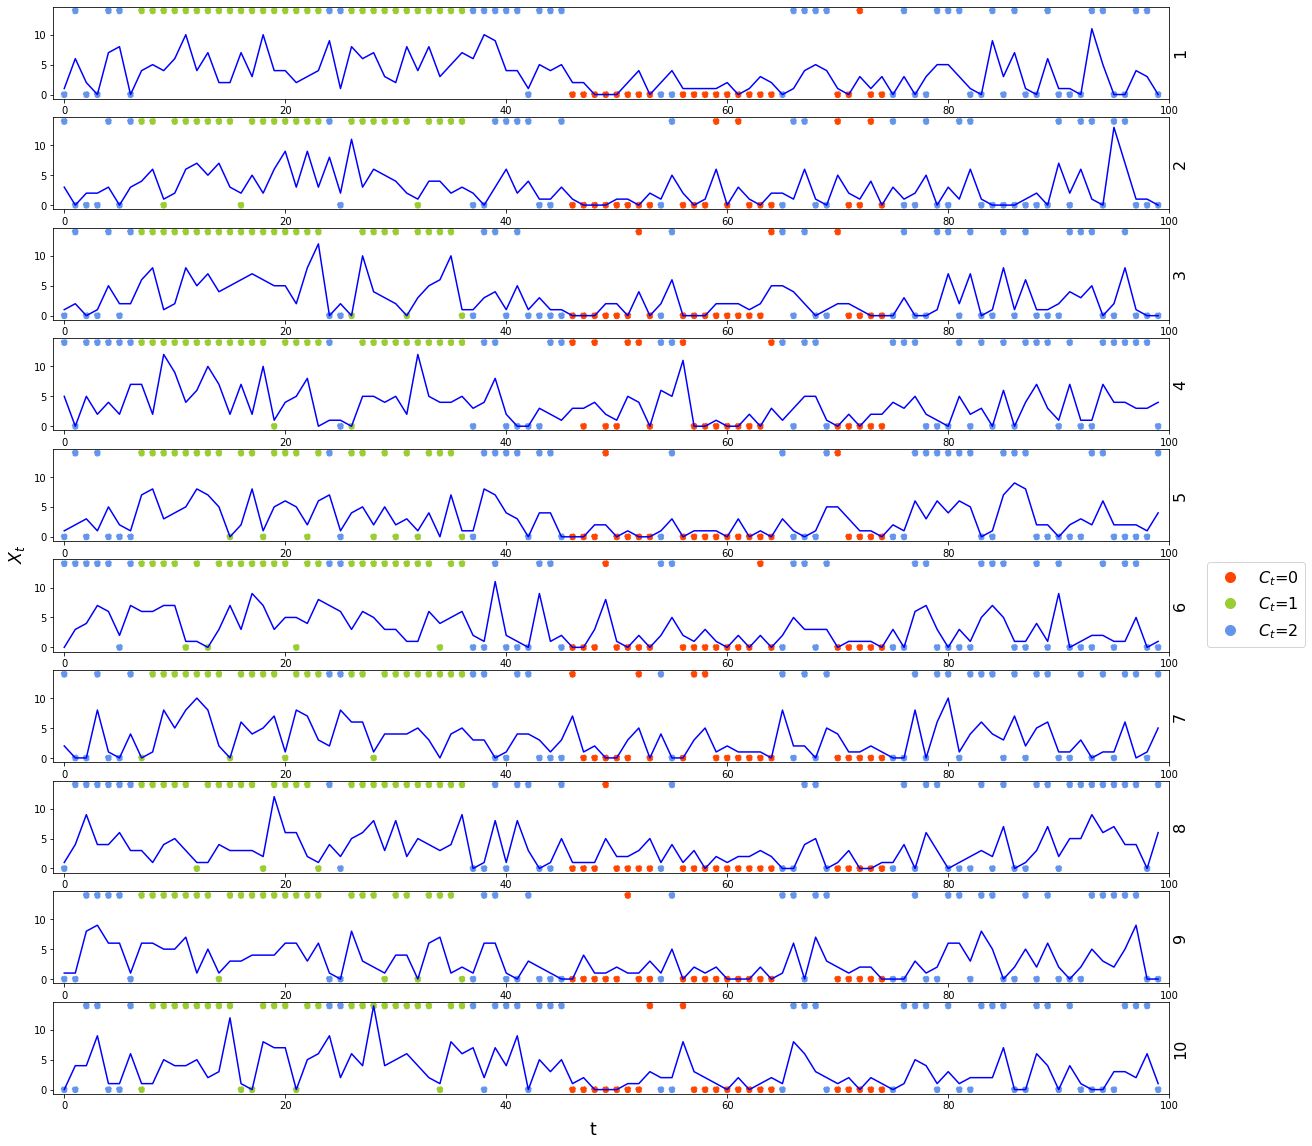

In [116]:
from matplotlib.lines import Line2D

colors = pltcolor(C)
fig, axs = plt.subplots(n)
fig.set_figheight(20)
fig.set_figwidth(20)

i_list = [i for i in range(T)]
for i in range(n):
    axs[i].set_xlim(xmin=-1,xmax=T)
    axs[i].plot(X[0:,i], color="blue")
    scatter = axs[i].scatter(i_list,Z[0:,i]*np.max(X), linestyle='--', marker='o', color=colors)
    axs[i].yaxis.set_label_position("right")
    axs[i].set_ylabel(str(i+1),fontsize=16)
fig.text(0.5, 0.1, 't', ha='center', va='center', size='xx-large')
fig.text(0.1, 0.5, r'$X_{t}$', ha='center', va='center', rotation='vertical', size='xx-large')

legend_elements = [
    Line2D([0], [0], marker='o', color='orangered', label=r'$C_{t}$=0', markersize=10,linestyle = 'None'),
    Line2D([0], [0], marker='o', color='yellowgreen', label=r'$C_{t}$=1', markersize=10,linestyle = 'None'),
    Line2D([0], [0], marker='o', color='cornflowerblue', label=r'$C_{t}$=2', markersize=10,linestyle = 'None'),]
fig.legend(handles=legend_elements, bbox_to_anchor=(1, 0.5),prop={'size': 16})

plt.show()

Text(0.1, 0.5, '$X_{t}$')

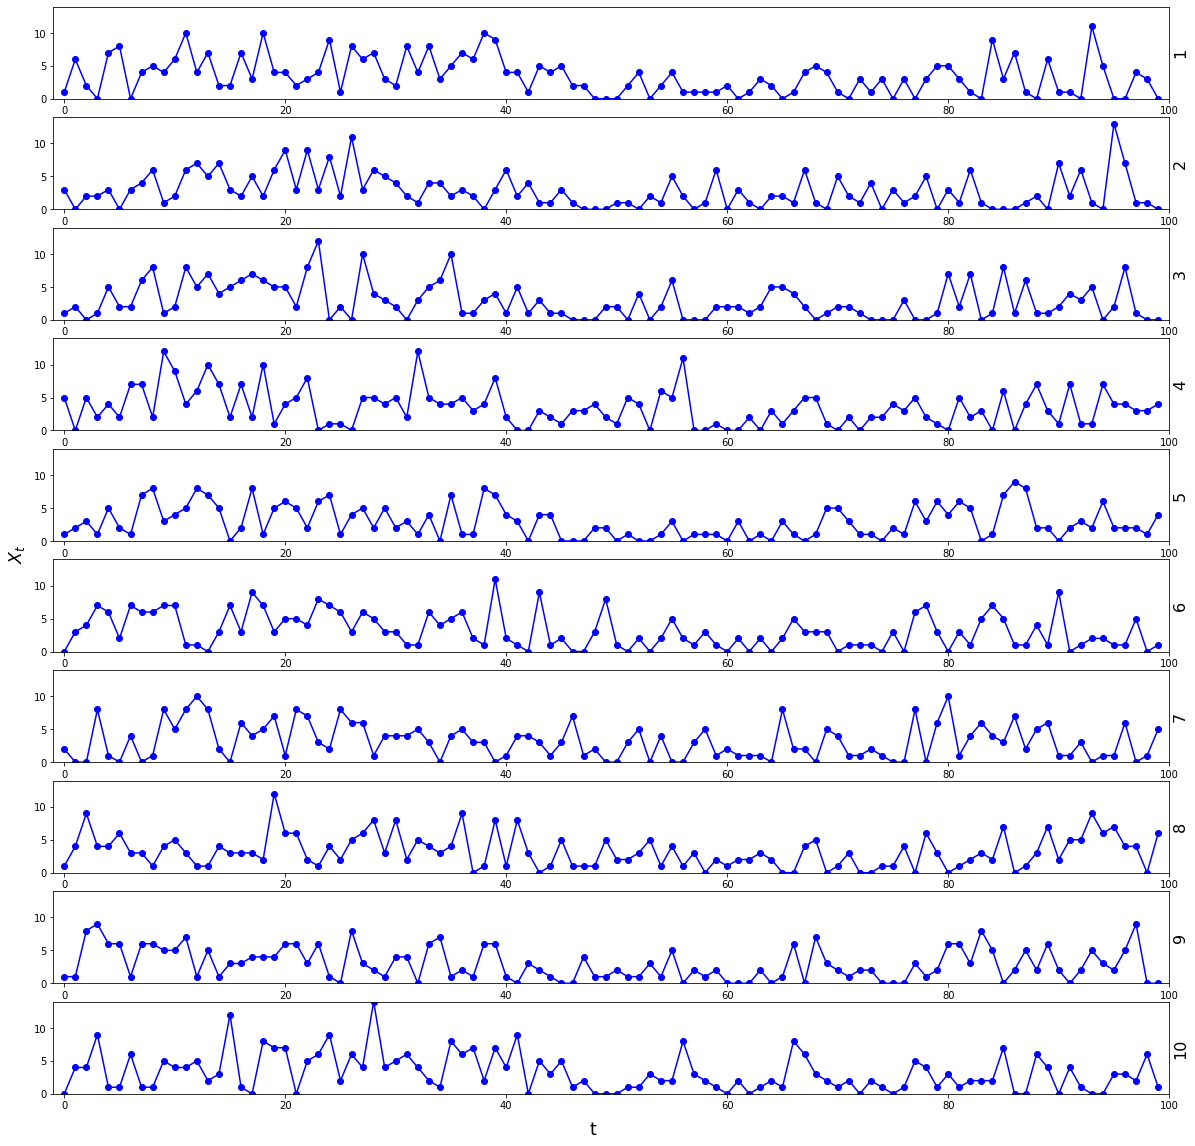

In [115]:
fig, axs = plt.subplots(n)
fig.set_figheight(20)
fig.set_figwidth(20)

i_list = [i for i in range(T)]
for i in range(n):
    axs[i].set_xlim(xmin=-1,xmax=T)
    axs[i].set_ylim([0,np.max(X)])
    axs[i].plot(X[0:,i], color="blue", marker='o')
    axs[i].yaxis.set_label_position("right")
    axs[i].set_ylabel(str(i+1),fontsize=16)

fig.text(0.5, 0.1, 't', ha='center', va='center', size='xx-large')
fig.text(0.1, 0.5, r'$X_{t}$', ha='center', va='center', rotation='vertical', size='xx-large')

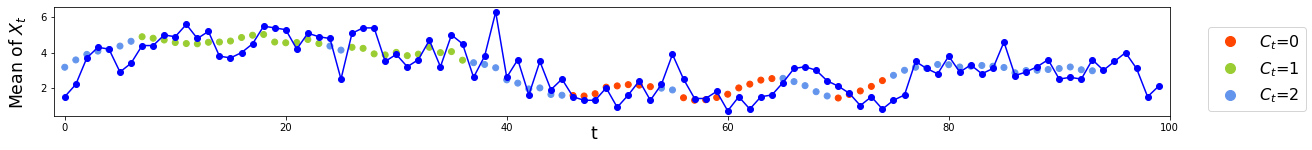

In [112]:
N = 7
cumsum, moving_aves = [0], []

for i, x in enumerate(np.average(X,axis=1), 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        moving_aves.append(moving_ave)

fig, axs = plt.subplots(1)
fig.set_figheight(2)
fig.set_figwidth(20)
axs.set_xlim(xmin=-1,xmax=T)
axs.plot(np.average(X,axis=1), color="blue", marker='o')
axs.scatter(i_list[0:len(moving_aves)],moving_aves, marker='o', color=colors[0:len(moving_aves)])
#axs.plot(z, color="red", marker='o')
fig.text(0.5, 0, 't', ha='center', va='center', size='xx-large')
fig.text(0.1, 0.5, r'Mean of $X_{t}$', ha='center', va='center', rotation='vertical', size='xx-large')
legend_elements = [
    Line2D([0], [0], marker='o', color='orangered', label=r'$C_{t}$=0', markersize=10,linestyle = 'None'),
    Line2D([0], [0], marker='o', color='yellowgreen', label=r'$C_{t}$=1', markersize=10,linestyle = 'None'),
    Line2D([0], [0], marker='o', color='cornflowerblue', label=r'$C_{t}$=2', markersize=10,linestyle = 'None'),]
fig.legend(handles=legend_elements, bbox_to_anchor=(1, 0.8),prop={'size': 16})